In [77]:
# Imports here please
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import add_dummy_feature

np.random.seed(69)

In [29]:
# Generate linear'ish data

m = 100
x = 10 * np.random.rand(m,1) # column vector of random x values; matrix [y,x] -> [100, 1]
y = (4 + 7 * x) + 10*(np.random.rand(m,1)-0.5) # random y values following y=33x + 4

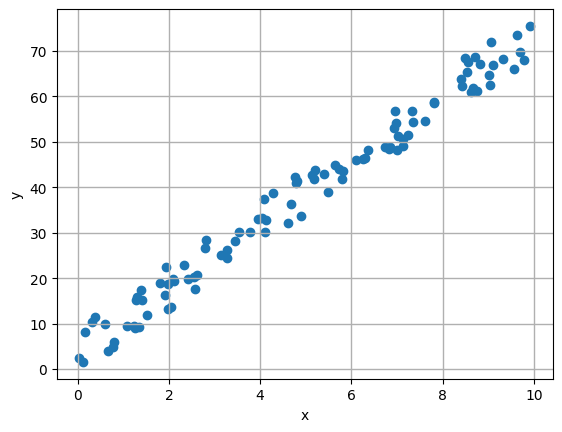

In [30]:
plt.scatter(x, y)
plt.ylabel('y')
plt.xlabel('x')
plt.grid(linewidth=1)
plt.show()

In [33]:
x_b = add_dummy_feature(x) # adds x0 = 1 to each instance?
theta_best = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
theta_best

array([[4.03215906],
       [6.93335342]])

[[ 4.03215906]
 [73.36569331]]


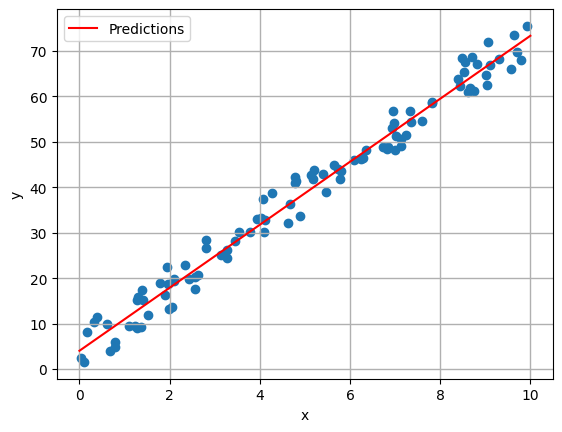

In [34]:
x_new = np.array([[0],[10]])
x_new_b = add_dummy_feature(x_new)
y_pred = x_new_b @ theta_best
print(y_pred)

plt.scatter(x, y)
plt.plot(x_new, y_pred, "r-", label="Predictions")
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid(linewidth=1)
plt.show()

In [36]:
# Scikit-learn linear regression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(x_new))

[4.03215906] [[6.93335342]]
[[ 4.03215906]
 [73.36569331]]


In [76]:
# Ad-hoc gradient descent
eta = 0.01 # learning rate
n_epochs = int(1000)
m = int(len(x_b))

theta = np.random.randn(2,1).astype(np.float64) # random init model params

for epoch in range(n_epochs):
    gradients = (x_b @ theta)
    gradients -= y
    gradients = x_b.T.astype(np.float64) @ gradients.astype(np.float64)
    gradients = (2 / m) * gradients
    theta = theta - eta * gradients

theta

(2, 1)
(100, 2)
(100, 1)


array([[4.01897334],
       [6.93534735]])

In [78]:
sgd_reg = SGDRegressor(
    max_iter=1_000,
    tol=1e-5,
    penalty=None,
    eta0=0.01,
    n_iter_no_change=100,
    random_state=69
)
sgd_reg.fit(x, y.ravel()) # y.ravel() because f() expects 1D targets. 
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.02176379] [6.88660965]
